In [1]:
#Build - Train - Test Recurrent Neural Networks
#Using Sine Wave Data with Simple RNN & Keras

In [2]:
# Import basic libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# from timeseries RNN neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

2024-11-07 02:58:59.239196: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-07 02:58:59.966224: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-07 02:58:59.966263: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-11-07 02:59:02.226186: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

In [4]:
# imprt Keras: Time Series Data Preparation
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

#import Keras: min-max scaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
#Generate Date

In [6]:
# create a simple sine wave using Numpy
x = np.linspace(0,64,1024)
y= np.sin(x)

In [7]:
x

array([0.00000000e+00, 6.25610948e-02, 1.25122190e-01, ...,
       6.38748778e+01, 6.39374389e+01, 6.40000000e+01])

In [8]:
y

array([0.        , 0.06252029, 0.12479597, ..., 0.86393146, 0.89372716,
       0.92002604])

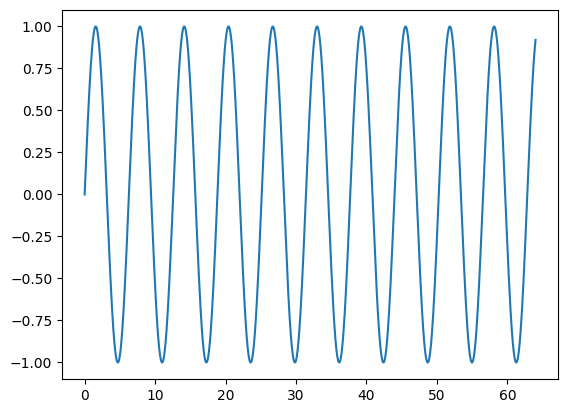

In [9]:
plt.plot(x,y)

In [10]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [11]:
df.head()

,Sine
0.000000,0.000000
0.062561,0.062520
0.125122,0.124796
0.187683,0.186583
0.250244,0.247641


In [12]:
len(df)

1024

In [13]:
# Split Data --> Train/ Test

In [14]:
# Set Percentage of data to be used for training
train_percent = 0.2

In [15]:
# Number of data points reserved for training the model
# 20% of the original dataset

len(df)*train_percent



204.8

In [16]:
# Need to find the index location of the split

test_length = np.round(len(df)*train_percent)

In [17]:
test_length

205.0

In [18]:
# The testing data set starts at this index

test_start_index = int(len(df) - test_length)

In [19]:
test_start_index

819

In [20]:
# create separate training and testing datasets
data_train = df.iloc[:test_start_index]

# The testing data set starts at this index
data_test = df.iloc[test_start_index:]

In [21]:
data_train.head()

,Sine
0.000000,0.000000
0.062561,0.062520
0.125122,0.124796
0.187683,0.186583
0.250244,0.247641


In [22]:
data_test.head()

,Sine
51.237537,0.826045
51.300098,0.859666
51.362659,0.889923
51.425220,0.916698
51.487781,0.939887


In [23]:
# create a MinMaxScaler object to normalize the data
scaler = MinMaxScaler()

In [24]:
#Train the scaler on the training data
scaler.fit(data_train)

MinMaxScaler()

In [25]:
# Normalize the training data
normalized_train = scaler.transform(data_train)

# Normalize the testing data
normalized_test = scaler.transform(data_test)

#### Create Timeseries Generator Instance

In [26]:
# set the length of the output sequences
length = 50

# batch size: number of timeseries samples in each batch
batch_size = 1

# create a TimeseriesGenerator object: train_tsGenerator

train_tsGenerator = TimeseriesGenerator(normalized_train, normalized_train, length=length, batch_size=batch_size)

In [27]:
len(normalized_train)

819

In [28]:
# what does the first batch look like?
X,y = train_tsGenerator[0]

In [29]:
#  Print x.flatten()
X.flatten()

array([0.49999882, 0.53125908, 0.56239703, 0.59329085, 0.62381964,
       0.65386398, 0.6833063 , 0.7120314 , 0.73992691, 0.76688367,
       0.79279621, 0.81756315, 0.84108759, 0.86327747, 0.88404598,
       0.90331187, 0.92099975, 0.93704041, 0.9513711 , 0.96393574,
       0.97468518, 0.98357735, 0.99057747, 0.99565814, 0.99879949,
       0.99998922, 0.99922268, 0.99650287, 0.99184044, 0.98525361,
       0.97676818, 0.96641732, 0.95424156, 0.94028851, 0.92461278,
       0.90727571, 0.88834511, 0.86789506, 0.84600558, 0.82276231,
       0.79825619, 0.7725831 , 0.7458435 , 0.718142  , 0.68958699,
       0.66029019, 0.63036624, 0.59993221, 0.56910717, 0.53801175])

In [30]:
# print y: waht does X predict?
y

array([[0.50676759]])

#### Build Simple RNN Model

In [31]:
# Data set: Only one column/attribute: Sine values of index x
n_features = 1

# define the model
model = Sequential()

# Add a SimpleRNN layer : Using Simpe RNN cells

model.add(SimpleRNN(100, input_shape=(length, n_features)))

# Add a Dense layer with one neuron

model.add(Dense(1))


2024-11-07 02:59:19.354896: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-11-07 02:59:19.355582: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-11-07 02:59:19.355610: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (recurrent-nnr-vm): /proc/driver/nvidia/version does not exist
2024-11-07 02:59:19.356693: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Compile Model

In [32]:
# Compile the model
# Loss function: Mean Squared Error
# Note: Why MES? the data is real values/continuous: A regression problem
# Optimizer: Adam

model.compile(optimizer='adam', loss='mse')

# Train the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


### Train (Fit) Model

In [33]:
# fit the model
# use fit_generator instead of fit

model.fit_generator(train_tsGenerator, epochs=5)

/var/tmp/ipykernel_3209/3838688548.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_tsGenerator, epochs=5)


Epoch 1/5
769/769 [==============================] - 6s 6ms/step - loss: 0.0046
Epoch 2/5
769/769 [==============================] - 5s 6ms/step - loss: 2.2419e-04
Epoch 3/5
769/769 [==============================] - 5s 6ms/step - loss: 3.2414e-04
Epoch 4/5
769/769 [==============================] - 5s 6ms/step - loss: 1.1710e-04
Epoch 5/5
769/769 [==============================] - 5s 6ms/step - loss: 7.7736e-06


<Axes: >

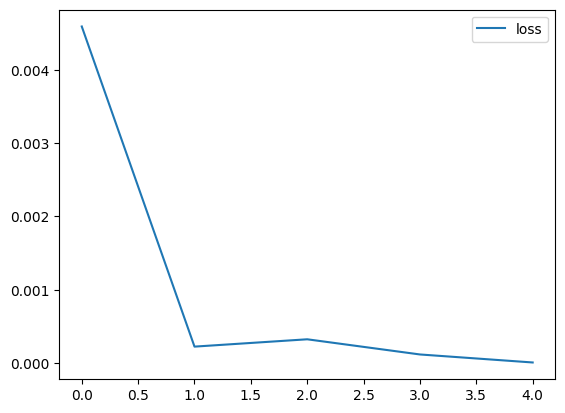

In [34]:
# Load the Loss data into a DataFrame
df_model_loss = pd.DataFrame(model.history.history)

# Plot the Loss data

df_model_loss.plot()

In [35]:
length

50

In [36]:
# Take a sneak peak at the test data
first_eval_batch = normalized_train[-length:]

first_eval_batch

array([[8.31976169e-02],
       [6.67457884e-02],
       [5.19891118e-02],
       [3.89853243e-02],
       [2.77853048e-02],
       [1.84328746e-02],
       [1.09646261e-02],
       [5.40977978e-03],
       [1.79006951e-03],
       [1.19657859e-04],
       [4.05080501e-04],
       [2.64522069e-03],
       [6.83131362e-03],
       [1.29469807e-02],
       [2.09682938e-02],
       [3.08638684e-02],
       [4.25949871e-02],
       [5.61157506e-02],
       [7.13732572e-02],
       [8.83078103e-02],
       [1.06853151e-01],
       [1.26936720e-01],
       [1.48479936e-01],
       [1.71398511e-01],
       [1.95602771e-01],
       [2.20998016e-01],
       [2.47484883e-01],
       [2.74959740e-01],
       [3.03315088e-01],
       [3.32439984e-01],
       [3.62220472e-01],
       [3.92540034e-01],
       [4.23280041e-01],
       [4.54320219e-01],
       [4.85539119e-01],
       [5.16814595e-01],
       [5.48024277e-01],
       [5.79046054e-01],
       [6.09758550e-01],
       [6.40041598e-01],


In [37]:
# reshape the data to the format required by the model
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

first_eval_batch

array([[[8.31976169e-02],
        [6.67457884e-02],
        [5.19891118e-02],
        [3.89853243e-02],
        [2.77853048e-02],
        [1.84328746e-02],
        [1.09646261e-02],
        [5.40977978e-03],
        [1.79006951e-03],
        [1.19657859e-04],
        [4.05080501e-04],
        [2.64522069e-03],
        [6.83131362e-03],
        [1.29469807e-02],
        [2.09682938e-02],
        [3.08638684e-02],
        [4.25949871e-02],
        [5.61157506e-02],
        [7.13732572e-02],
        [8.83078103e-02],
        [1.06853151e-01],
        [1.26936720e-01],
        [1.48479936e-01],
        [1.71398511e-01],
        [1.95602771e-01],
        [2.20998016e-01],
        [2.47484883e-01],
        [2.74959740e-01],
        [3.03315088e-01],
        [3.32439984e-01],
        [3.62220472e-01],
        [3.92540034e-01],
        [4.23280041e-01],
        [4.54320219e-01],
        [4.85539119e-01],
        [5.16814595e-01],
        [5.48024277e-01],
        [5.79046054e-01],
        [6.0

In [38]:
first_eval_batch.shape

(1, 50, 1)

#### Evaluate Model

In [39]:
# All the Code for evaluation

# store the predictions
test_predictions = []

# last n points from the training set
first_eval_batch = normalized_train[-length:]

# reshape the data to the format required by the model
current_batch = first_eval_batch.reshape((1, length, n_features))

# Run a loop to predict the future values
for i in range(len(data_test)):
    
    # get the prediction
    current_pred = model.predict(current_batch)[0]
    
    # store the prediction
    test_predictions.append(current_pred)
    
    # update the current batch to include the prediction
    # drop the first value and add the prediction
    # append the current prediction to the current batch
    # maintain the length of the batch
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 [==============================] - 0s 22ms/step


In [40]:
# Inverse Transform the predictions
true_predictions = scaler.inverse_transform(test_predictions)

# Add the predictions to the test data
true_predictions

array([[ 0.82121542],
       [ 0.85271446],
       [ 0.87984794],
       [ 0.90320834],
       [ 0.9216006 ],
       [ 0.93521723],
       [ 0.94528394],
       [ 0.95099762],
       [ 0.95202341],
       [ 0.94925276],
       [ 0.94236511],
       [ 0.93163536],
       [ 0.91659764],
       [ 0.89803456],
       [ 0.87631876],
       [ 0.85093026],
       [ 0.82191494],
       [ 0.78988364],
       [ 0.75501971],
       [ 0.71758539],
       [ 0.67679558],
       [ 0.63373591],
       [ 0.58810002],
       [ 0.54028118],
       [ 0.49032659],
       [ 0.43816366],
       [ 0.38411235],
       [ 0.32814963],
       [ 0.27063625],
       [ 0.21165625],
       [ 0.1512238 ],
       [ 0.08950735],
       [ 0.02673388],
       [-0.03690314],
       [-0.10107058],
       [-0.16576534],
       [-0.23064189],
       [-0.29544353],
       [-0.36009519],
       [-0.42405187],
       [-0.48701673],
       [-0.54878423],
       [-0.60908111],
       [-0.66755922],
       [-0.72373433],
       [-0

In [41]:
data_test

,Sine
51.237537,0.826045
51.300098,0.859666
51.362659,0.889923
51.425220,0.916698
51.487781,0.939887
...,...
63.749756,0.794329
63.812317,0.830756
63.874878,0.863931
63.937439,0.893727


In [42]:
#create a new column in the test data set

data_test['Predictions'] = true_predictions

/var/tmp/ipykernel_3209/3802011234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Predictions'] = true_predictions


<Axes: >

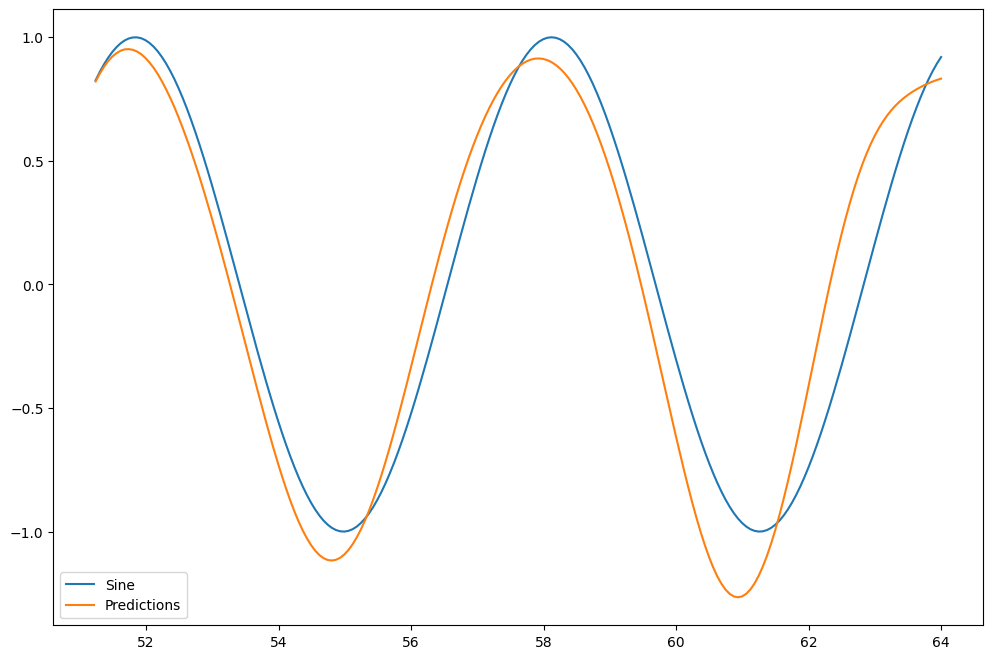

In [43]:
# Plot the data
data_test.plot(figsize=(12,8))